In [17]:
from zipfile import ZipFile
import pandas as pd
archive = ZipFile("C:/Users/kowal/PycharmProjects/inz_playground/path/to/SoccerNet/tracking/train.zip")
tabular_data = archive.extract("train/SNMOT-060/det/det.txt")
df = pd.read_csv(tabular_data, names=["Frame ID", "Track ID", "Top Left", "Top Y", "Width", "Height", "Confidence Score", "Blank1", "Blank2", "Blank3"])

In [18]:
df

Frame ID  Track ID  Top Left  Top Y  Width  Height  Confidence Score  \
0             1        -1       914    855     55     172                 1   
1             1        -1       917    575     32     122                 1   
2             1        -1       956    557     53     133                 1   
3             1        -1      1257    673     44     141                 1   
4             1        -1      1888    400     30     101                 1   
...         ...       ...       ...    ...    ...     ...               ...   
13535       750        -1       999    472     40      82                 1   
13536       750        -1       459    646     45     107                 1   
13537       750        -1       264    538     34      99                 1   
13538       750        -1      1458    722     44     110                 1   
13539       750        -1      1728    558     46      87                 1   

       Blank1  Blank2  Blank3  
0          -1      -1      -1  
1          -1      -1      -1  
2          -1      -1      -1  
3          -1      -1      -1  
4          -1      -1      -1  
...       ...     ...     ...  
13535      -1      -1      -1  
13536      -1      -1      -1  
13537      -1      -1      -1  
13538      -1      -1      -1  
13539      -1      -1      -1  

[13540 rows x 10 columns]

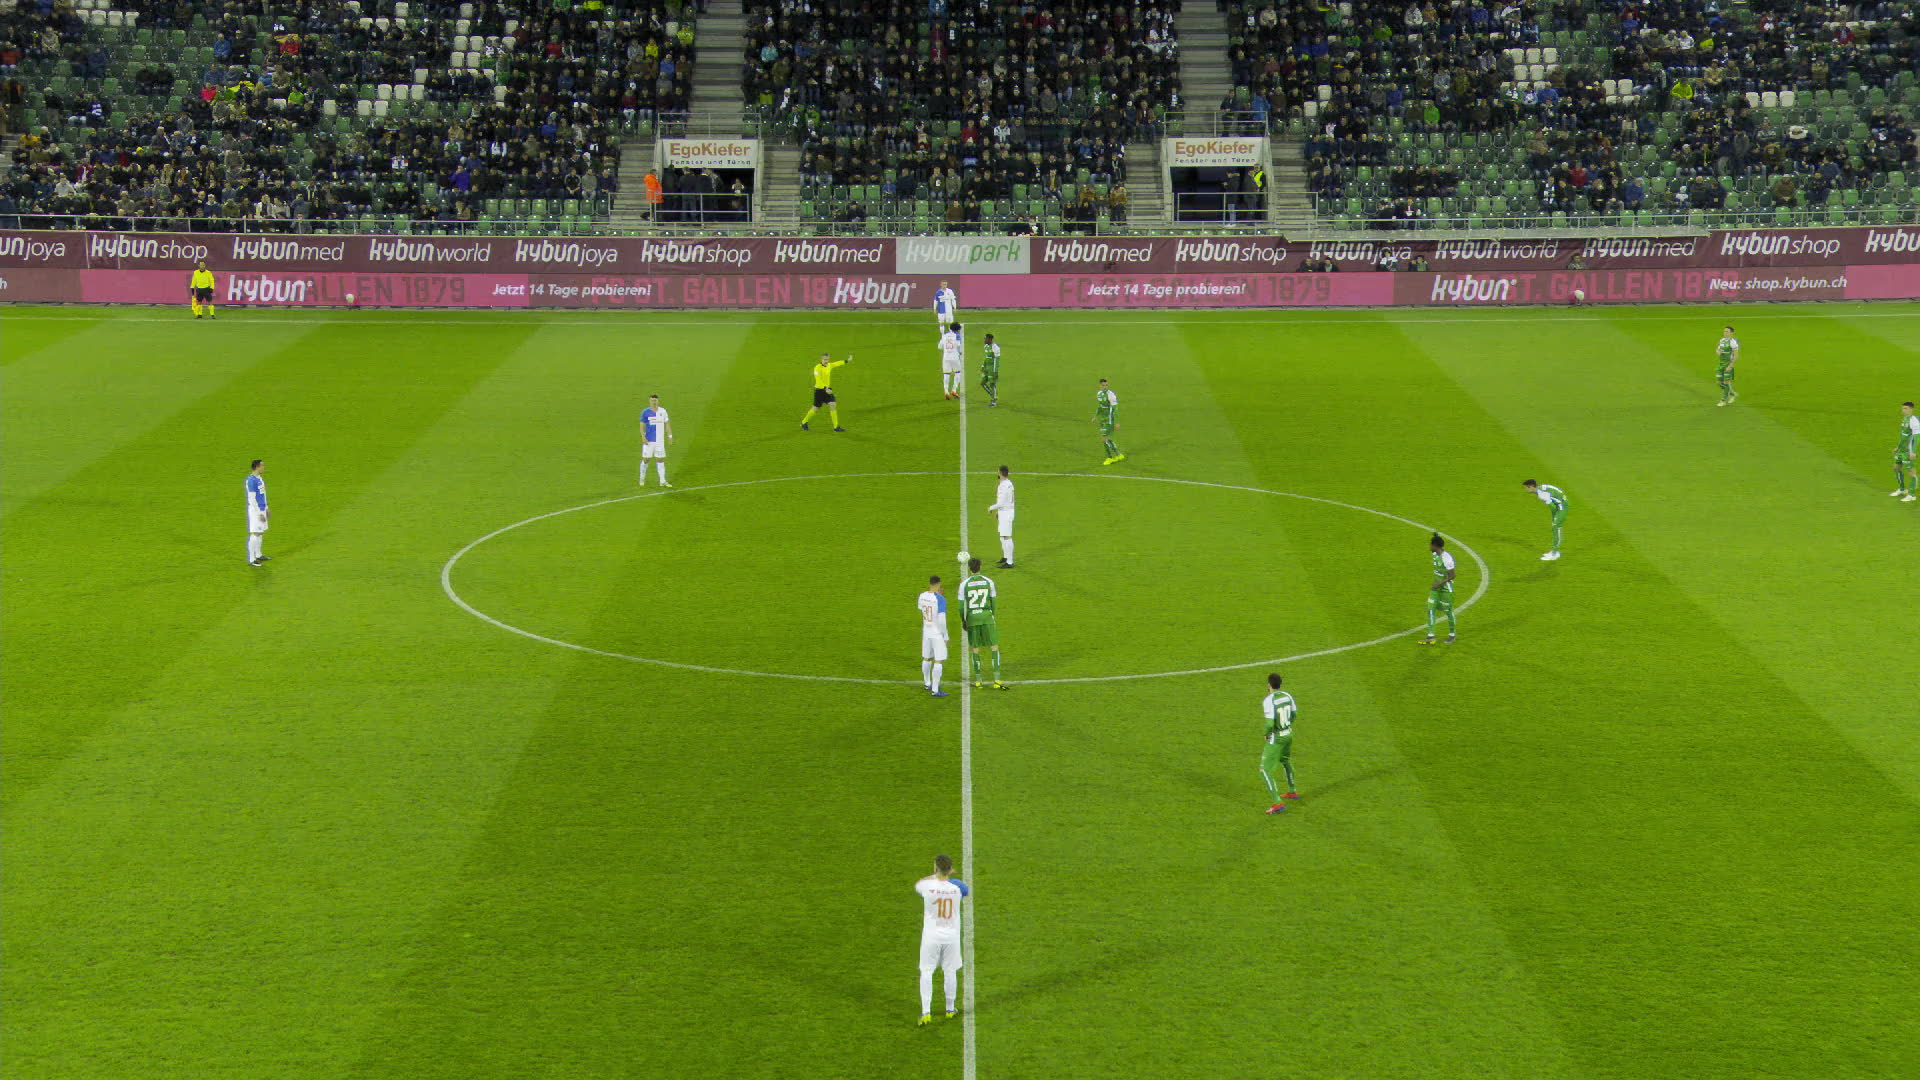

In [25]:
from PIL import Image
#img = Image.open(img1)
#img

In [42]:
import cv2

def draw_bounding_box(given_id):
    # Read the image
    image_path = archive.extract(f"train/SNMOT-060/img1/{given_id:06}.jpg")
    img = cv2.imread(image_path)

    # Extract bounding box coordinates
    filtered_df = df[df['Frame ID'] == given_id]
    bounding_boxes = list()
    for index, row in filtered_df.iterrows():
        bounding_box = (row['Top Left'], row['Top Y'], row['Width'], row['Height'])
        bounding_boxes.append(bounding_box)
    # Draw bounding box on the image
    for bounding_box in bounding_boxes:
        x, y, w, h = bounding_box
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    img_height, img_width, _ = img.shape
    scale_factor = min(800 / img_width, 600 / img_height)
    if scale_factor < 1:
        img = cv2.resize(img, (int(img_width * scale_factor), int(img_height * scale_factor)))

    
    # Display the image with bounding box
    cv2.imshow('Bounding Box', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
  # Example bounding box coordinates (x, y, width, height)

draw_bounding_box(600)

In [4]:
from SoccerNet.Downloader import SoccerNetDownloader
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="data/SoccerNetGS")
mySoccerNetDownloader.downloadDataTask(task="gamestate-2024",
                                       split=["train"])


  0%|          | 0.00/16.8G [00:00<?, ?iB/s]
